In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\ML Data\Uber Data Analysis\uber data.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [5]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [6]:
df.shape

(150000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [8]:
df.columns = df.columns.str.strip()

df['Booking ID'] = df['Booking ID'].str.replace('"', '', regex=False)
df['Customer ID'] = df['Customer ID'].str.replace('"', '', regex=False)

numeric_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']

for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

categorical_cols = ['Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason']

for col in categorical_cols:
    df[col].fillna('Not Applicable', inplace=True)

if 'Payment Method' in df.columns:
    mode_value = df['Payment Method'].mode()[0]
    df['Payment Method'].fillna(mode_value, inplace=True)


df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date', 'Time'])

In [10]:
df.head()

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,datetime
0,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,8.3,28.8,NaN,Not Applicable,NaN,Not Applicable,NaN,Not Applicable,414.0,23.72,4.3,4.5,UPI,2024-03-23 12:29:38
1,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,Not Applicable,NaN,Not Applicable,1.0,Vehicle Breakdown,237.0,5.73,4.3,4.5,UPI,2024-11-29 18:01:39
2,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,Not Applicable,NaN,Not Applicable,NaN,Not Applicable,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10
3,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,Not Applicable,NaN,Not Applicable,NaN,Not Applicable,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25
4,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,Not Applicable,NaN,Not Applicable,NaN,Not Applicable,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00


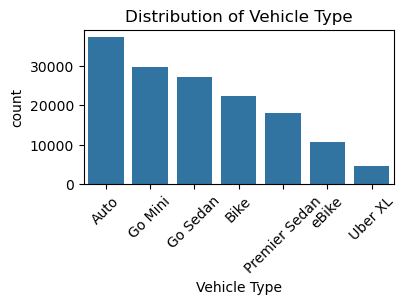

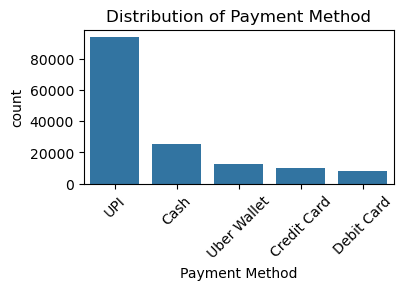

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical(col):
    plt.figure(figsize=(4,2))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

plot_categorical('Vehicle Type')
plot_categorical('Payment Method')


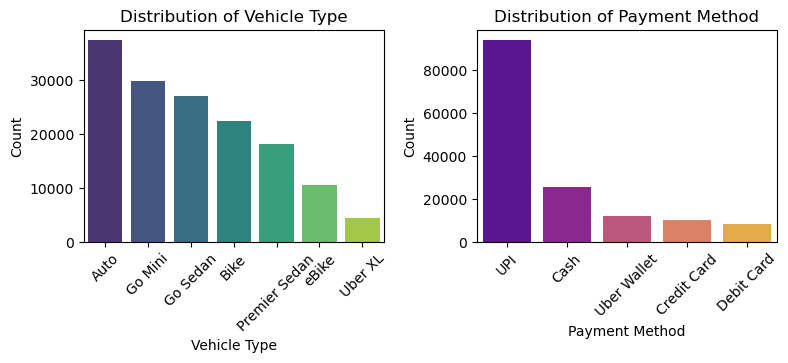

In [20]:
def plot_categorical_subplots(df, cols):
    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    axes = axes.flatten()

    # Define color palettes for the bars
    palettes = ['viridis', 'plasma', 'cool', 'magma']

    for i, col in enumerate(cols):
        sns.countplot(
            x=col, 
            data=df, 
            order=df[col].value_counts().index, 
            ax=axes[i],
            palette=palettes[i]   # different bar color palette
        )
        axes[i].set_title(f"Distribution of {col}")
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")

    # Hide unused subplots (if fewer than 4 columns)
    for j in range(len(cols), 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_subplots(df, ['Vehicle Type', 'Payment Method'])

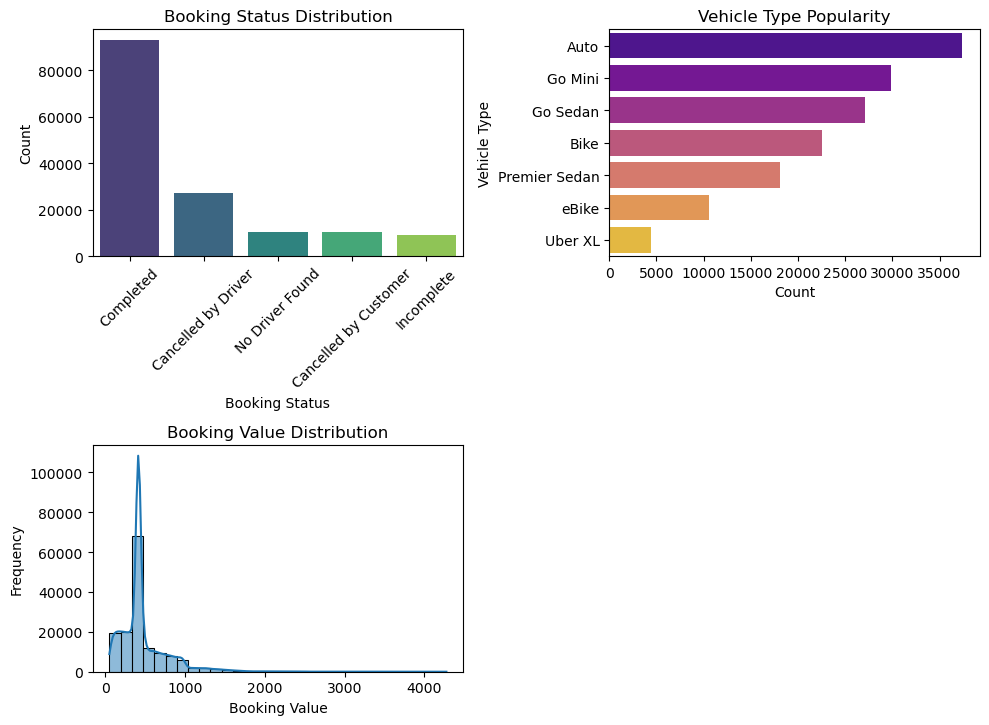

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
plt.figure(figsize=(10, 8))

# 1) Booking Status distribution (barplot)
plt.subplot(2, 2, 1)
if 'Booking Status' in df.columns:
    booking_status_counts = df['Booking Status'].value_counts()
    sns.barplot(x=booking_status_counts.index, y=booking_status_counts.values, palette='viridis')
    plt.title('Booking Status Distribution')
    plt.xlabel('Booking Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, "Column 'Booking Status' not found", ha='center')
    plt.title('Booking Status Distribution (missing)')

# 2) Vehicle Type popularity (horizontal barplot)
plt.subplot(2, 2, 2)
if 'Vehicle Type' in df.columns:
    vehicle_type_counts = df['Vehicle Type'].value_counts()
    sns.barplot(x=vehicle_type_counts.values, y=vehicle_type_counts.index, palette='plasma')
    plt.title('Vehicle Type Popularity')
    plt.xlabel('Count')
    plt.ylabel('Vehicle Type')
else:
    plt.text(0.5, 0.5, "Column 'Vehicle Type' not found", ha='center')
    plt.title('Vehicle Type Popularity (missing)')

# 3) Booking Value distribution (histogram + KDE)
plt.subplot(2, 2, 3)
if 'Booking Value' in df.columns:
    sns.histplot(df['Booking Value'].dropna(), bins=30, kde=True)
    plt.title('Booking Value Distribution')
    plt.xlabel('Booking Value')
    plt.ylabel('Frequency')
else:
    plt.text(0.5, 0.5, "Column 'Booking Value' not found", ha='center')
    plt.title('Booking Value Distribution (missing)')


# Improve layout and show
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

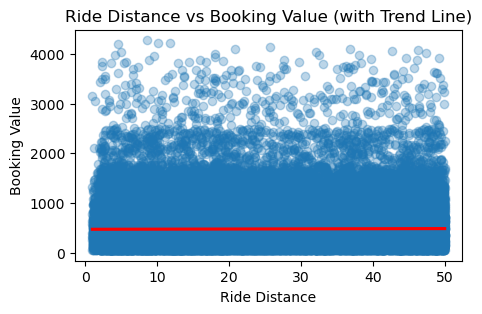

In [28]:
plt.figure(figsize=(5,3))   # Set figure size

sns.regplot(
    x='Ride Distance', 
    y='Booking Value', 
    data=df,
    scatter_kws={'alpha':0.3},   
    line_kws={'color':'red'}     # Regression line in red
)

plt.title("Ride Distance vs Booking Value (with Trend Line)")
plt.show()

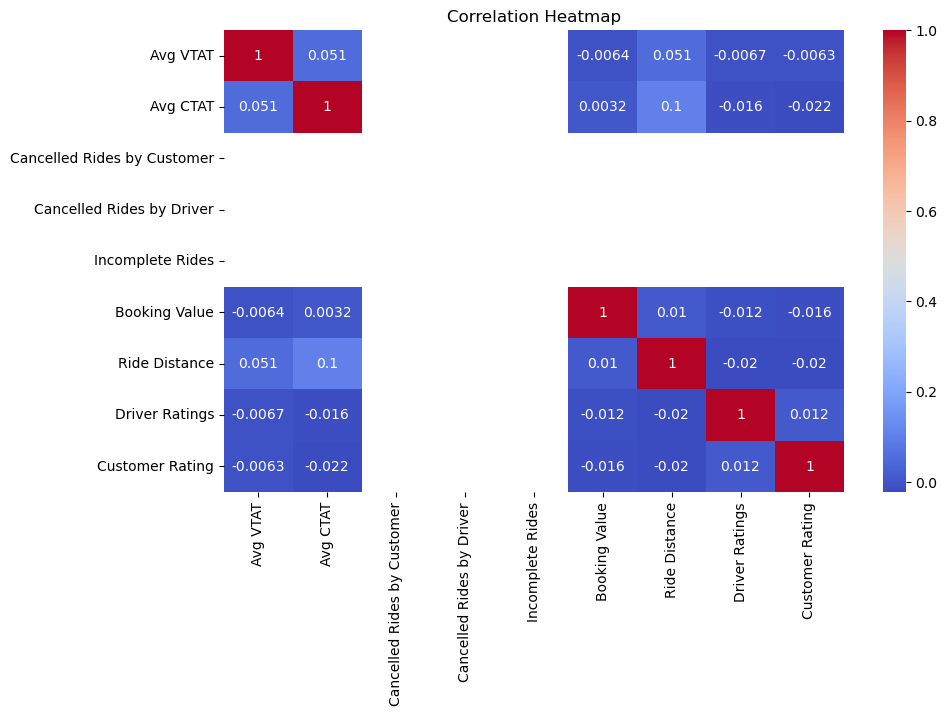

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [34]:
target = 'Booking Value'
X = df.drop(columns=[target])   # all features except Booking Value
y = df[target]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)